In [0]:
import pandas as pd
from pandas import Series, DataFrame

In [0]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


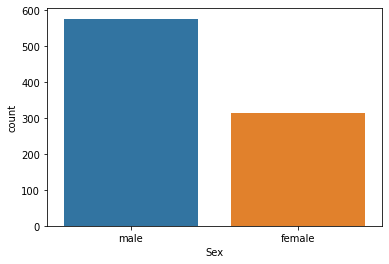

In [51]:
# Checking for gender
sns.countplot('Sex',data=titanic_df)

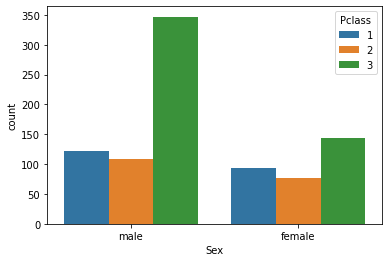

In [52]:
# separating gender by classes
sns.countplot('Sex', data=titanic_df, hue="Pclass")

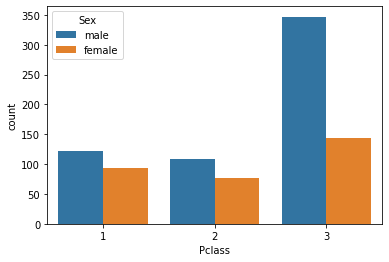

In [53]:
# gender by classes inverted
sns.countplot('Pclass', data=titanic_df, hue="Sex")

In [0]:
# creating a function to decide if someone is a child or not. Used under 16 as a child. 

def male_female_child(passenger):
  age,sex = passenger

  if age < 16:
    return 'child'
  else:
    return sex

In [0]:
# create column person to show male, female or child
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [56]:
# show first 10 indexes
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes


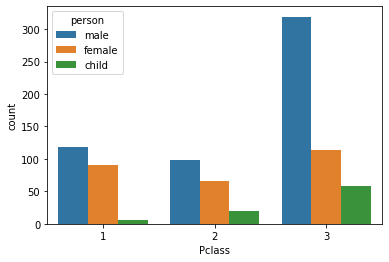

In [57]:
# countplot on class with male female and child
# a lot more males on third class
# more children in the third compared to first 

sns.countplot('Pclass',data=titanic_df, hue='person')

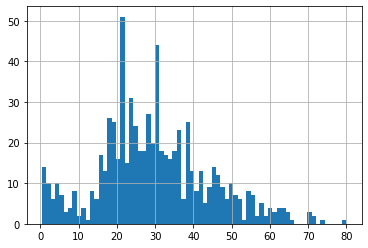

In [58]:
# using pandas to build histogram to show age

titanic_df['Age'].hist(bins=70)

In [59]:
# finding the average age for the passengers
# = 29 years old
titanic_df['Age'].mean()

29.69911764705882

In [15]:
# counting the people in the titanic

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

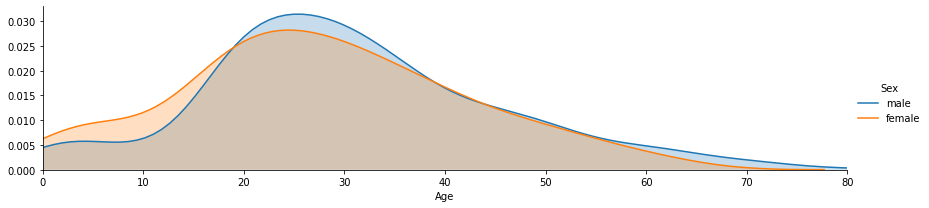

In [60]:
# using a FacetGrid to plot multiple kedplot on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

# using map to plot all the possible kdeplots for Age column
fig.map(sns.kdeplot,"Age",shade=True)

# variable setting the max age by the oldest passenger on board
oldest = titanic_df["Age"].max()

# set minimum age at 0
fig.set(xlim=(0,oldest))

# adding a legend to the plot
fig.add_legend()

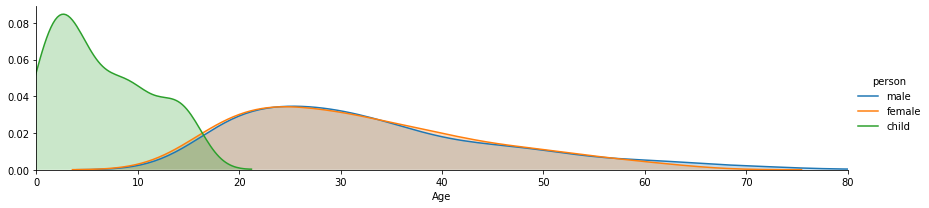

In [61]:
# same calculation as above but including children

fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

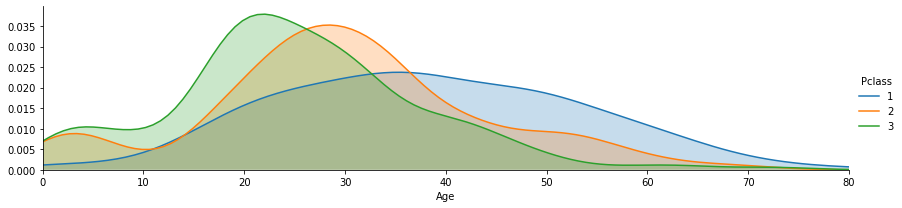

In [62]:
# same but using class as hue argument

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [0]:
# drop all null values from Cabin

deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

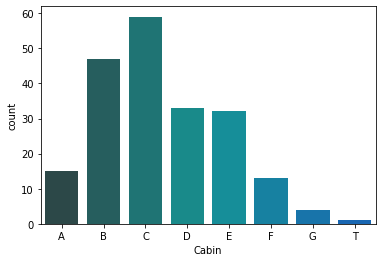

In [65]:
# Grab only the first letter needed to classify by class

# empty list
levels = []

# for loop grabbing first letter
for level in deck:
  levels.append(level[0])

# Resetting DataFrame and countplot
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']
cabin_df['Cabin'].values.sort() # use this to sort this list

sns.countplot('Cabin', data=cabin_df, palette='winter_d')

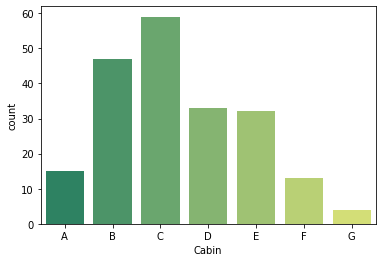

In [66]:
# need to take out that T cabin 

cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.countplot('Cabin', data=cabin_df, palette='summer')

# link for more matplotlib color palettes
http://matplotlib.org/users/colormaps.html

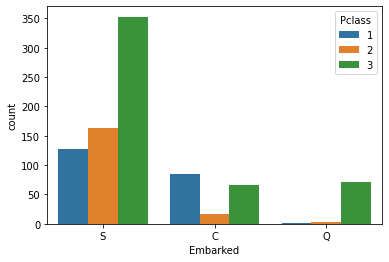

In [68]:
# Embarked represents the cities that the Titanic stopped. Queenstown, Southhampton and Cherbourg
# almost all passengers from Queenstown were in the 3rd class

sns.countplot('Embarked', data=titanic_df, hue="Pclass")

*Who was alone and who was with family?*

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [0]:
# summing up two columns that are binary to decide whether someone was alone or with family. Parch and Siblings. If eqauls to 0 
# it meant that person was alone

titanic_df['Alone'] = titanic_df.SibSp+titanic_df.Parch

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [28]:
# if value of alone > 0 set the column to "With Family" otherwise "Alone"

titanic_df['Alone'].loc[titanic_df['Alone'] > 0 ] = 'With Family' # .loc = location

titanic_df['Alone'].loc[titanic_df['Alone'] == 0 ] = "Alone"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


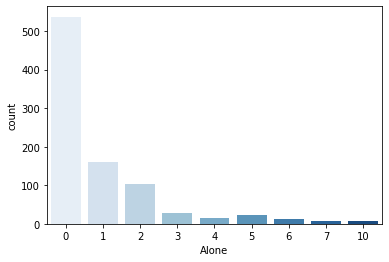

In [70]:
# simple viz to show that most people were alone in the Titanic

sns.countplot('Alone', data= titanic_df, palette='Blues')

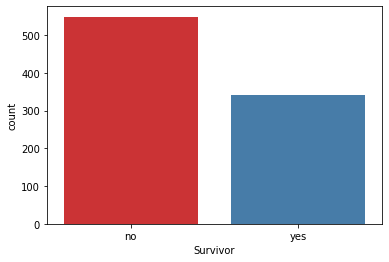

In [71]:

# creating a column to define survivor or not. More than one way to do this one 
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

# displaying the result using a different palette
sns.countplot('Survivor', data= titanic_df, palette='Set1')

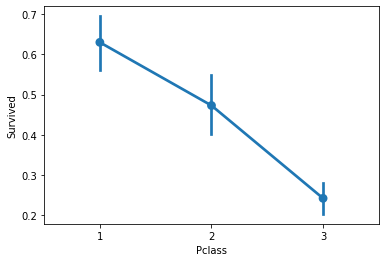

In [44]:
# measure how survived based on class only not considering gender or age

sns.pointplot('Pclass','Survived',data=titanic_df)

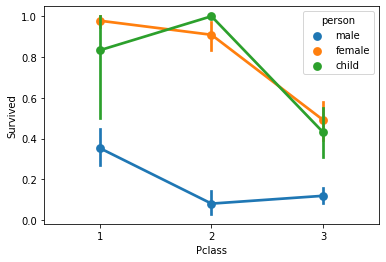

In [45]:
# now considering gender but not age

sns.pointplot('Pclass','Survived',hue='person', data=titanic_df)

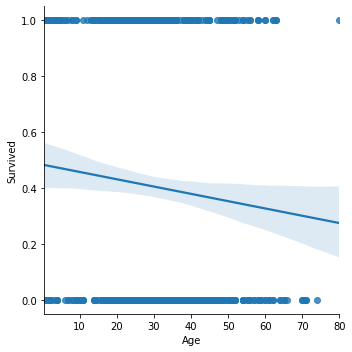

In [46]:
# using age vs survived

sns.lmplot('Age','Survived', data=titanic_df)

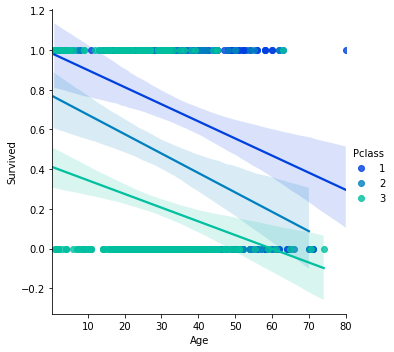

In [47]:
# considering the class that passenger was

sns.lmplot('Age','Survived', hue='Pclass', data=titanic_df, palette='winter')

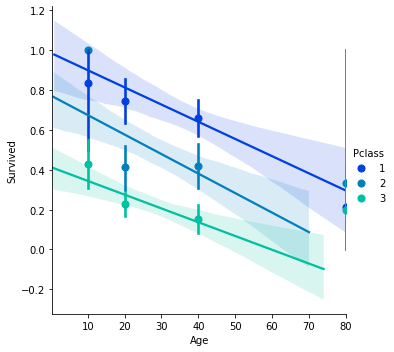

In [48]:
# to clean off the chart a bit using the list below to create bins

generations = [10,20,40,80]

sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

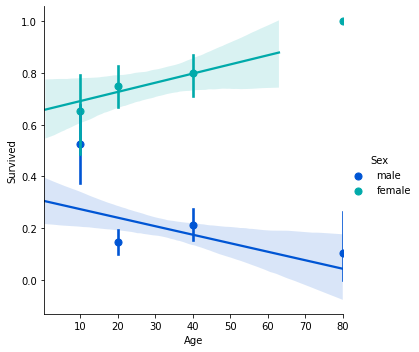

In [49]:
sns.lmplot('Age','Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

ValueError: ignored

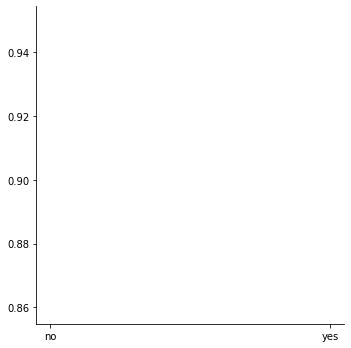

In [91]:
sns.lmplot('Survived','Alone', hue='', data=titanic_df, palette='winter', x_bins=generations)

In [77]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,no


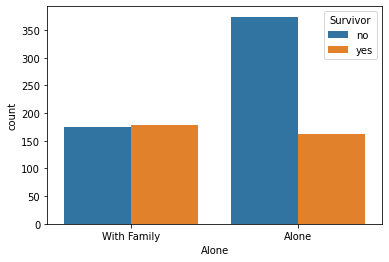

In [105]:
sns.countplot('Alone',hue='Survivor', data=titanic_df)

In [93]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
